# 목차
1. 데이터 분석 배경
1. 데이터 불러오기
1. 데이터 전처리
1. 탐색적 데이터 분석 (EDA)

# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
portfolio = pd.read_json('portfolio.json', lines=True)
profile = pd.read_json('profile.json', lines=True)
transcript = pd.read_json('transcript.json', lines=True)

# 데이터 Overview

## portfolio 데이터셋

In [ ]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [ ]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [ ]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [ ]:
portfolio['channels'].value_counts()

channels
[web, email, mobile, social]    4
[web, email, mobile]            3
[email, mobile, social]         2
[web, email]                    1
Name: count, dtype: int64

In [ ]:
portfolio['offer_type'].value_counts()

offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

## porfile 데이터셋

In [ ]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [ ]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [ ]:
profile.describe()


,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [ ]:
profile['gender'].value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

In [ ]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

<Axes: >

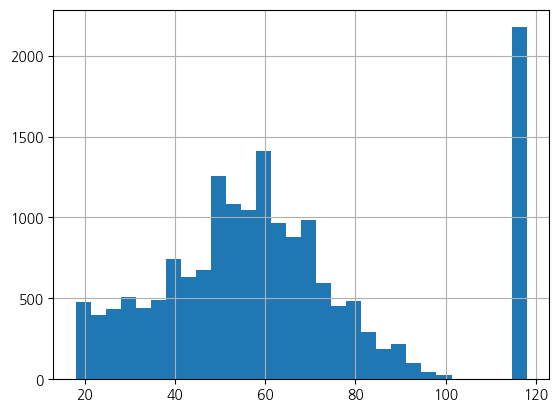

In [ ]:
profile['age'].hist(bins=30)

In [ ]:
profile[profile['age']>110]
# age 이상치가 gender, income의 결측치와 겹치는 것을 확인
# age 이상치를 제거함으로써 결측치도 함께 제거될 것으로 기대

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,2017-10-02,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,2016-09-01,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,2016-04-15,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,2018-03-05,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,2016-01-16,NaN


## transaction 데이터셋

In [ ]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [ ]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [ ]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [ ]:
transcript['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [ ]:
transcript[(~transcript['value'].astype(str).str.startswith("{'offer id")) & (~transcript['value'].astype(str).str.startswith("{'offer_id")) & (~transcript['value'].astype(str).str.startswith("{'amount"))]
# value 컬럼 시작은 {'offer id', {'offer_id', {'amount' 중 하나

,person,event,value,time


In [ ]:
transcript[(transcript['value'].astype(str).str.startswith("{'amount")) & (transcript['event']!='transaction')]

,person,event,value,time


In [ ]:
transcript['time'].value_counts().sort_index()

time
0      15561
6       2506
12      2215
18      2015
24      1921
       ...  
690     1260
696     1326
702     1115
708     1048
714     1130
Name: count, Length: 120, dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', None)
transcript.sort_values(by=['person','time']).head(20)

,person,event,value,time
55972,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168
77705,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},192
89291,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 22.16},228
113605,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},336
139992,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},372
153401,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},408
168412,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 8.57},414
168413,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",414
187554,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},456
204340,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},504


In [ ]:
value_df = pd.json_normalize(transcript['value'])
if 'offer id' in value_df.columns and 'offer_id' in value_df.columns:
    value_df['offer_id'] = value_df['offer_id'].fillna(value_df['offer id'])
transcript = pd.concat([transcript.reset_index(drop=True), value_df], axis=1)
transcript = transcript.drop(columns=['value', 'offer id'], errors='ignore')

In [ ]:
transcript.head()

,person,event,time,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


## 요약

|컬럼명|설명|타입|
|--|--|--|
|reward|고객이 쿠폰을 사용했을 때 받는 보상 금액|int|
|channels|쿠폰이 전달되는 방식(이메일, 모바일, 소셜)|string|
|difficulty|쿠폰을 사용하기 위해 충족해야 하는 최소 구매 금액|int|
|duration|쿠폰이 유효한 기간(일)|int|
|offer_type|쿠폰의 유형(할인, 구매 후 무료 아이템 등)|string|
|offer_id|쿠폰의 고유 식별자|string|

+ 총 10개의 쿠폰 종류가 있다.
+ channels: 이메일, 모바일, 소셜 미디어, 웹
+ offer_type: 할인, 1+1, 정보용(reward, difficulty 0)
+ reward는 0~10 사이의 값으로 분포되어 있음
+ difficulty는 0~20 사이의 값으로 분포되어 있음
+ duration은 3~10 사이의 값으로 분포되어 있음


|컬럼명|설명|타입|
|--|--|--|
|gender|고객의 성별|string|
|age|고객의 나이|int|
|id|고객의 고유 식별자|string|
|became_member_on|고객이 멤버십에 가입한 날짜|int|
|income|고객의 연간 소득|int|

+ 17000개의 고객 데이터
+ gender M, F, O, None 4가지 성별로 구성
+ age 이상치 발견
+ became_member_on은 int형으로 되어 있음 -> datetime형으로 변환 필요
+ inocme 단위가 너무 큼
+ gender, income 결측치 존재

|컬럼명|설명|타입|
|--|--|--|
|persion|고객의 고유 식별자|string|
|event|고객이 수행한 이벤트 유형(쿠폰 발송, 확인, 완료, 거래)|string|
|value|offer_id, reward, amount로 구성|string|
|time|테스트 시작 이후 경과된 시간 (hour)|int|

+ 총 306534개의 transaction 데이터
+ event: offer received, offer viewed, offer completed, transaction 4가지 이벤트로 구성
+ value: {'offer id', {'offer_id', {'amount' 중 하나로 시작 / amount로 시작하는 건 transaction 이벤트에 해당
+ time: 0~714 사이의 값으로 분포되어 있음 / 최대 30일 동안 진행되었으며, 퍼널 분석이 가능해 보임

### 세그먼트 분석
+ 쿠폰
    + 쿠폰 사용자 vs 비사용자
    + 쿠폰 유형별 사용자 분석
    + 쿠폰 사용자 행동 분석 (조회, 완료 등) 퍼널 분석?
+ 고객 특성
    + 고객 특성별 분석 (성별, 나이, 소득 등)
    + 가입 시기별 분석
+ 시간
    + 시험 기간별 분석
    + 쿠폰 사용기간 분석

### 유의 사항
1. 우연한 사용이 발생했는지. (쿠폰 확인 -> 거래 -> 쿠폰 완료 가 아닌 경우) 
2. value 형식에서 id형식만 추출
    - 새로운 컬럼을 통해 어떤 형식인지 기록

# 데이터 전처리

## 이상치 처리

In [ ]:
profile.drop(profile[profile['age']>110].index, inplace=True)

## 결측치 처리

In [ ]:
profile.isna().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

## 데이터 merge

In [ ]:
transcript = transcript.rename(columns={'person': 'id'})
portfolio = portfolio.rename(columns={'id': 'offer_id'})

# df = profile.merge(transcript, left_on='id', right_on='id', how='left')
# df = df.merge(portfolio, left_on='offer_id', right_on='offer_id', how='left')

In [ ]:
transcript.sort_values(by=['id','time']).head(30)

,id,event,time,amount,offer_id,reward
55972,0009655768c64bdeb2e877511632db8f,offer received,168,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN
77705,0009655768c64bdeb2e877511632db8f,offer viewed,192,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN
89291,0009655768c64bdeb2e877511632db8f,transaction,228,22.16,NaN,NaN
113605,0009655768c64bdeb2e877511632db8f,offer received,336,NaN,3f207df678b143eea3cee63160fa8bed,NaN
139992,0009655768c64bdeb2e877511632db8f,offer viewed,372,NaN,3f207df678b143eea3cee63160fa8bed,NaN
153401,0009655768c64bdeb2e877511632db8f,offer received,408,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN
168412,0009655768c64bdeb2e877511632db8f,transaction,414,8.57,NaN,NaN
168413,0009655768c64bdeb2e877511632db8f,offer completed,414,NaN,f19421c1d4aa40978ebb69ca19b0e20d,5.0
187554,0009655768c64bdeb2e877511632db8f,offer viewed,456,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN
204340,0009655768c64bdeb2e877511632db8f,offer received,504,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN


In [ ]:
# event가 transaction이면 offer_id가 결측이므로, event가 offer completed이면서 time이 같은 경우 offer_id 값을 채워줌
transcript.loc[transcript['event']=='offer completed', 'offer_id'] = transcript.loc[transcript['event']=='offer completed'].groupby(['id','time'])['offer_id'].ffill().bfill()


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
306529    NaN
306530    NaN
306531    NaN
306532    NaN
306533    NaN
Length: 306534, dtype: float64

## 피처 엔지니어링